In [9]:
import os
import sys
import pandas as pd 
import numpy as np

import ast 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("preprocessing_data_jkruk.csv")
print(f"Before duplicate removal, {data.shape=}")
data = data.drop_duplicates()
print(f"After duplicate removal, {data.shape=}")
data.head()

Before duplicate removal, data.shape=(39620, 20)
After duplicate removal, data.shape=(39030, 20)


,Title,imdbId,adult,budget,genres,original_language,original_title,popularity,production_companies,release_date,revenue,runtime,tagline,vote_average,vote_count,casts,keywords,num_releases,num_translations,Actors
0,Toy Story (1995),114709,0.0,1.344100,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",0.0,Toy Story,13.233161,"[{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...",1995-10-30,5.243183,-0.554372,NaN,1.516530,11.230518,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 779, 'name': 'martial art...",2.198140,3.380860,"['Tom Hanks', 'Tim Allen', 'Don Rickles']"
1,Jumanji (1995),113497,0.0,3.233367,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",0.0,Jumanji,0.497344,"[{'id': 559, 'logo_path': '/jqWioYeGSyTLuHth01...",1995-12-15,3.629983,0.258067,Roll the dice and unleash the excitement!,0.933025,6.413346,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 7035, 'name': 'giant inse...",3.041993,2.978730,"['Robin Williams', 'Kirsten Dunst', 'Bradley P..."
2,Grumpier Old Men (1995),113228,0.0,1.074205,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0.0,Grumpier Old Men,0.061151,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...",1995-12-22,0.842709,0.152097,Still Yelling. Still Fighting. Still Ready for...,0.293721,-0.038351,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 1495, 'name': 'fishing'},...",0.148783,1.370211,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret']"
3,Waiting to Exhale (1995),114885,0.0,0.588393,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0.0,Waiting to Exhale,0.180840,"[{'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVR...",1995-12-22,0.987697,1.070506,Friends are the people who let you be yourself...,0.188499,-0.167241,"{'cast': [{'adult': False, 'gender': 1, 'id': ...","{'keywords': [{'id': 818, 'name': 'based on no...",0.148783,0.465419,"['Whitney Houston', 'Angela Bassett', 'Loretta..."
4,Father of the Bride Part II (1995),113041,0.0,-0.275271,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",0.0,Father of the Bride Part II,0.311671,"[{'id': 5842, 'logo_path': None, 'name': 'Sand...",1995-12-08,0.916922,0.328714,Just When His World Is Back To Normal... He's ...,0.126322,0.176225,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 970, 'name': 'parent chil...",0.510435,1.671808,"['Steve Martin', 'Diane Keaton', 'Martin Short']"


# Genres

Viewing how typical genre values look like:

In [5]:
sample_genres = data.genres[:2].map(lambda x: ast.literal_eval(x))
print(sample_genres[0], sample_genres[1], sep='\n')

[{'id': 16, 'name': 'Animation'}, {'id': 12, 'name': 'Adventure'}, {'id': 10751, 'name': 'Family'}, {'id': 35, 'name': 'Comedy'}]
[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]


/var/folders/wl/614qr9zs0297plmh5fqppf4m0000gn/T/ipykernel_29885/4244885068.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sample_genres = data.genres[:2].map(lambda x: ast.literal_eval(x))


In [6]:
num_genres = []
for i, row in data.iterrows():
    try:
        genre_pp = ast.literal_eval(row['genres'])
        genres_ = [x['name'] for x in genre_pp]
        num_genres.append(len(genres_))
    except:
        num_genres.append(0)
#     types = [x['name'] for x in r0]
#     genres.append(types)
num_genres

[4,
 3,
 2,
 3,
 2,
 4,
 2,
 4,
 1,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 4,
 4,
 2,
 1,
 3,
 2,
 3,
 2,
 1,
 3,
 2,
 4,
 3,
 1,
 4,
 3,
 2,
 1,
 2,
 4,
 2,
 2,
 3,
 2,
 3,
 4,
 2,
 3,
 3,
 2,
 1,
 4,
 1,
 4,
 3,
 3,
 3,
 3,
 2,
 3,
 1,
 2,
 1,
 4,
 2,
 2,
 1,
 4,
 1,
 3,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 1,
 3,
 1,
 4,
 3,
 3,
 1,
 1,
 1,
 5,
 1,
 2,
 3,
 2,
 1,
 1,
 2,
 3,
 6,
 1,
 1,
 4,
 2,
 4,
 3,
 1,
 1,
 2,
 3,
 2,
 2,
 3,
 1,
 2,
 3,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 3,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 3,
 4,
 3,
 2,
 3,
 4,
 3,
 5,
 2,
 3,
 2,
 2,
 1,
 1,
 3,
 3,
 3,
 4,
 1,
 3,
 4,
 2,
 4,
 2,
 4,
 3,
 4,
 3,
 5,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 5,
 3,
 2,
 2,
 5,
 2,
 1,
 3,
 3,
 1,
 3,
 1,
 1,
 2,
 2,
 3,
 1,
 4,
 2,
 1,
 3,
 2,
 1,
 2,
 3,
 1,
 2,
 3,
 1,
 2,
 1,
 4,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 4,
 2,
 1,
 3,
 3,
 1,
 2,
 3,
 3,
 3,
 1,
 3,
 2,
 3,
 3,
 2,
 3,
 4,
 5,
 3,
 3,
 2,
 3,
 7,
 4,
 1,
 2,
 2,
 3,
 3,
 2,
 3,


In [7]:
np.mean(num_genres)

2.13394824493979

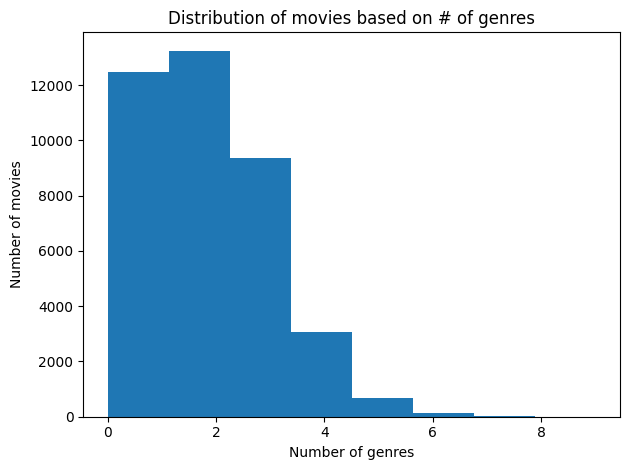

In [10]:
fig, axs = plt.subplots(1,1, tight_layout = True)
axs.hist(num_genres, bins = 8)
plt.title("Distribution of movies based on # of genres")
plt.xlabel("Number of genres")
plt.ylabel("Number of movies")
plt.show()

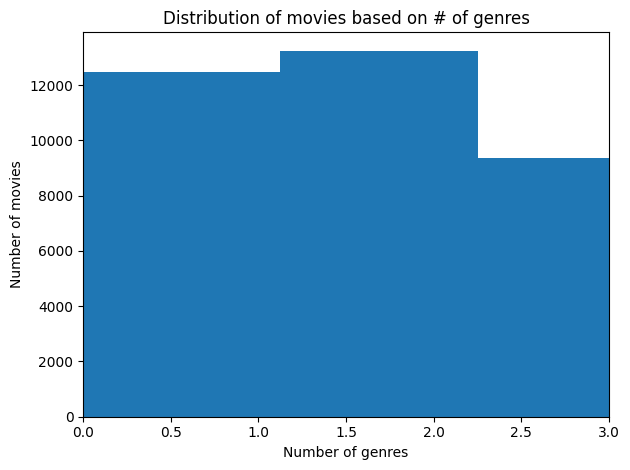

In [11]:
fig, axs = plt.subplots(1,1, tight_layout = True)
axs.hist(num_genres, bins = 8)
plt.title("Distribution of movies based on # of genres")
plt.xlabel("Number of genres")
plt.ylabel("Number of movies")
plt.xlim([0,3])
plt.show()

### Notes:
* 

In [12]:
# Dropping empty genre rows
data = data[data['genres'].notna()]
data
data.loc[data['genres'].isna()]
len(data)

39030

In [13]:
all_genres = []
for i, row in data.iterrows():
    gen = ast.literal_eval(row['genres'])
    gen_ = [x['name'] for x in gen]
#     print(gen_)
    all_genres.append(gen_)
all_genres

[['Animation', 'Adventure', 'Family', 'Comedy'],
 ['Adventure', 'Fantasy', 'Family'],
 ['Romance', 'Comedy'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy', 'Family'],
 ['Action', 'Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Romance'],
 ['Family', 'Action', 'Adventure', 'Drama'],
 ['Action'],
 ['Adventure', 'Action', 'Thriller'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy', 'Horror', 'Fantasy'],
 ['Family', 'Animation', 'Adventure'],
 ['Drama', 'History'],
 ['Action', 'Adventure'],
 ['Crime', 'Drama'],
 ['Drama', 'Romance'],
 ['Crime', 'Comedy'],
 ['Crime', 'Comedy', 'Adventure'],
 ['Action', 'Comedy', 'Crime'],
 ['Comedy', 'Thriller', 'Crime'],
 ['Thriller', 'Crime'],
 ['Action', 'Adventure', 'Crime', 'Thriller'],
 ['Drama', 'Fantasy', 'Science Fiction', 'Thriller'],
 ['Drama', 'Romance'],
 ['Drama'],
 ['Comedy', 'Drama', 'Romance'],
 ['Drama', 'Romance'],
 ['Fantasy', 'Science Fiction', 'Adventure'],
 ['Drama', 'Crime'],
 ['Drama'],
 ['Science Fiction', 'Thriller', 'Mystery'],
 ['Romanc

In [14]:
len(all_genres), len(data)

(39030, 39030)

In [16]:
unq_gen = set([item for sublist in all_genres for item in sublist])
print(len(unq_gen))
unq_gen

19


{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [18]:
genre_dict = {}
for idx, val in enumerate(sorted(unq_gen)):
    genre_dict[val] = idx
genre_dict    

{'Action': 0,
 'Adventure': 1,
 'Animation': 2,
 'Comedy': 3,
 'Crime': 4,
 'Documentary': 5,
 'Drama': 6,
 'Family': 7,
 'Fantasy': 8,
 'History': 9,
 'Horror': 10,
 'Music': 11,
 'Mystery': 12,
 'Romance': 13,
 'Science Fiction': 14,
 'TV Movie': 15,
 'Thriller': 16,
 'War': 17,
 'Western': 18}

In [19]:
import json

# saving genre dictionary:
genre_f = "genres_dict.json"
with open(genre_f, 'w') as outfile:
    json.dump(genre_dict, outfile)

### Generating the Top Genre Index Column

In [20]:
#data_ = data.loc[data['genres'] != "[]"]
#data_ = data[data['genres'].map(lambda x : x != [])]
top_idx = []
for i, row in data.iterrows():
    t1 = ast.literal_eval(row['genres'])[:1]
    #print(t1)
    t_ = [genre_dict[x['name']] for x in t1]
    top_idx.append(t_)
#top_idx = [x for x in top_idx if len(x) != 0]
len(top_idx)

39030

In [21]:
data['Top Genre Index'] = top_idx
data.head()

,Title,imdbId,adult,budget,genres,original_language,original_title,popularity,production_companies,release_date,...,runtime,tagline,vote_average,vote_count,casts,keywords,num_releases,num_translations,Actors,Top Genre Index
0,Toy Story (1995),114709,0.0,1.344100,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",0.0,Toy Story,13.233161,"[{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...",1995-10-30,...,-0.554372,NaN,1.516530,11.230518,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 779, 'name': 'martial art...",2.198140,3.380860,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",[2]
1,Jumanji (1995),113497,0.0,3.233367,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",0.0,Jumanji,0.497344,"[{'id': 559, 'logo_path': '/jqWioYeGSyTLuHth01...",1995-12-15,...,0.258067,Roll the dice and unleash the excitement!,0.933025,6.413346,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 7035, 'name': 'giant inse...",3.041993,2.978730,"['Robin Williams', 'Kirsten Dunst', 'Bradley P...",[1]
2,Grumpier Old Men (1995),113228,0.0,1.074205,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0.0,Grumpier Old Men,0.061151,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...",1995-12-22,...,0.152097,Still Yelling. Still Fighting. Still Ready for...,0.293721,-0.038351,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 1495, 'name': 'fishing'},...",0.148783,1.370211,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret']",[13]
3,Waiting to Exhale (1995),114885,0.0,0.588393,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0.0,Waiting to Exhale,0.180840,"[{'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVR...",1995-12-22,...,1.070506,Friends are the people who let you be yourself...,0.188499,-0.167241,"{'cast': [{'adult': False, 'gender': 1, 'id': ...","{'keywords': [{'id': 818, 'name': 'based on no...",0.148783,0.465419,"['Whitney Houston', 'Angela Bassett', 'Loretta...",[3]
4,Father of the Bride Part II (1995),113041,0.0,-0.275271,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",0.0,Father of the Bride Part II,0.311671,"[{'id': 5842, 'logo_path': None, 'name': 'Sand...",1995-12-08,...,0.328714,Just When His World Is Back To Normal... He's ...,0.126322,0.176225,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 970, 'name': 'parent chil...",0.510435,1.671808,"['Steve Martin', 'Diane Keaton', 'Martin Short']",[3]


### Generating Genre Indices Column

In [22]:
top_idxs = []
for i, row in data.iterrows():
    t1 = ast.literal_eval(row['genres'])
    t_ = [genre_dict[x['name']] for x in t1]
    top_idxs.append(t_)
top_idxs
# top_idx = unq_gen = [item for sublist in top_idx for item in sublist]
# len(top_idx)

[[2, 1, 7, 3],
 [1, 8, 7],
 [13, 3],
 [3, 6, 13],
 [3, 7],
 [0, 4, 6, 16],
 [3, 13],
 [7, 0, 1, 6],
 [0],
 [1, 0, 16],
 [3, 6, 13],
 [3, 10, 8],
 [7, 2, 1],
 [6, 9],
 [0, 1],
 [4, 6],
 [6, 13],
 [4, 3],
 [4, 3, 1],
 [0, 3, 4],
 [3, 16, 4],
 [16, 4],
 [0, 1, 4, 16],
 [6, 8, 14, 16],
 [6, 13],
 [6],
 [3, 6, 13],
 [6, 13],
 [8, 14, 1],
 [6, 4],
 [6],
 [14, 16, 12],
 [13, 1],
 [8, 6, 3, 7],
 [9, 6, 13],
 [6],
 [1, 9, 6, 7],
 [3, 7, 13],
 [3, 13],
 [6],
 [6, 17],
 [0, 6, 4, 17],
 [6, 13],
 [0, 8],
 [6, 3, 4],
 [6, 13],
 [4, 12, 16],
 [1, 2, 7, 13],
 [6, 13],
 [6, 4, 16],
 [0, 16, 6],
 [3, 13],
 [6],
 [0, 1, 3, 7],
 [6],
 [7, 8, 3, 1],
 [3, 6, 13],
 [3, 6, 13],
 [16, 6, 12],
 [1, 7, 8],
 [16, 4],
 [6, 11, 7],
 [3],
 [3, 13],
 [3],
 [14, 10, 0, 16],
 [6, 7],
 [3, 13],
 [3],
 [10, 0, 16, 4],
 [0],
 [3, 6, 13],
 [6],
 [6, 13],
 [3],
 [10, 14],
 [5],
 [6, 16],
 [16],
 [6],
 [6, 4],
 [6, 3],
 [13, 6],
 [3, 6],
 [6, 13],
 [1, 0, 6],
 [7, 3, 1],
 [3],
 [16, 4, 0],
 [6],
 [6, 10, 16, 9],
 [3, 10, 13

In [23]:
data['Top Genre Indices'] = top_idxs
data.head()

,Title,imdbId,adult,budget,genres,original_language,original_title,popularity,production_companies,release_date,...,tagline,vote_average,vote_count,casts,keywords,num_releases,num_translations,Actors,Top Genre Index,Top Genre Indices
0,Toy Story (1995),114709,0.0,1.344100,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",0.0,Toy Story,13.233161,"[{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...",1995-10-30,...,NaN,1.516530,11.230518,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 779, 'name': 'martial art...",2.198140,3.380860,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",[2],"[2, 1, 7, 3]"
1,Jumanji (1995),113497,0.0,3.233367,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",0.0,Jumanji,0.497344,"[{'id': 559, 'logo_path': '/jqWioYeGSyTLuHth01...",1995-12-15,...,Roll the dice and unleash the excitement!,0.933025,6.413346,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 7035, 'name': 'giant inse...",3.041993,2.978730,"['Robin Williams', 'Kirsten Dunst', 'Bradley P...",[1],"[1, 8, 7]"
2,Grumpier Old Men (1995),113228,0.0,1.074205,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0.0,Grumpier Old Men,0.061151,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...",1995-12-22,...,Still Yelling. Still Fighting. Still Ready for...,0.293721,-0.038351,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 1495, 'name': 'fishing'},...",0.148783,1.370211,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret']",[13],"[13, 3]"
3,Waiting to Exhale (1995),114885,0.0,0.588393,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0.0,Waiting to Exhale,0.180840,"[{'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVR...",1995-12-22,...,Friends are the people who let you be yourself...,0.188499,-0.167241,"{'cast': [{'adult': False, 'gender': 1, 'id': ...","{'keywords': [{'id': 818, 'name': 'based on no...",0.148783,0.465419,"['Whitney Houston', 'Angela Bassett', 'Loretta...",[3],"[3, 6, 13]"
4,Father of the Bride Part II (1995),113041,0.0,-0.275271,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",0.0,Father of the Bride Part II,0.311671,"[{'id': 5842, 'logo_path': None, 'name': 'Sand...",1995-12-08,...,Just When His World Is Back To Normal... He's ...,0.126322,0.176225,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 970, 'name': 'parent chil...",0.510435,1.671808,"['Steve Martin', 'Diane Keaton', 'Martin Short']",[3],"[3, 7]"


### Production Companies

View sample `production_companies` values:

In [24]:
sample_prod_companies = data.production_companies[:2].map(lambda x: ast.literal_eval(x))
print(sample_prod_companies[0], sample_prod_companies[1], sep='\n')

[{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUHpPEwLf7.png', 'name': 'Pixar', 'origin_country': 'US'}]
[{'id': 559, 'logo_path': '/jqWioYeGSyTLuHth0141bTGvu6H.png', 'name': 'TriStar Pictures', 'origin_country': 'US'}, {'id': 2550, 'logo_path': None, 'name': 'Teitler Film', 'origin_country': 'US'}, {'id': 10201, 'logo_path': None, 'name': 'Interscope Communications', 'origin_country': ''}]


/var/folders/wl/614qr9zs0297plmh5fqppf4m0000gn/T/ipykernel_29885/636978264.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sample_prod_companies = data.production_companies[:2].map(lambda x: ast.literal_eval(x))


In [25]:
num_prod = []
for i, row in data.iterrows():
    try: 
        prod_pp = ast.literal_eval(row['production_companies'])
        prod_ = [x['name'] for x in prod_pp]
        num_prod.append(len(prod_))
    except:
        num_prod.append(0)
#     types = [x['name'] for x in r0]
#     genres.append(types)
num_prod

[1,
 3,
 2,
 1,
 2,
 6,
 7,
 2,
 4,
 2,
 2,
 2,
 3,
 2,
 10,
 4,
 2,
 2,
 2,
 1,
 2,
 2,
 6,
 2,
 3,
 1,
 1,
 1,
 21,
 4,
 3,
 3,
 1,
 2,
 7,
 3,
 1,
 4,
 1,
 3,
 5,
 3,
 1,
 2,
 2,
 2,
 3,
 2,
 1,
 2,
 1,
 2,
 6,
 2,
 2,
 3,
 3,
 5,
 5,
 3,
 1,
 4,
 3,
 2,
 4,
 1,
 1,
 4,
 1,
 4,
 2,
 4,
 3,
 2,
 2,
 6,
 3,
 1,
 1,
 2,
 1,
 3,
 2,
 3,
 2,
 3,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 3,
 2,
 5,
 1,
 6,
 1,
 3,
 1,
 3,
 3,
 3,
 2,
 3,
 0,
 0,
 3,
 3,
 1,
 2,
 11,
 5,
 0,
 7,
 2,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 5,
 3,
 0,
 1,
 1,
 4,
 3,
 2,
 0,
 1,
 1,
 0,
 4,
 0,
 2,
 1,
 4,
 4,
 1,
 2,
 2,
 2,
 4,
 6,
 3,
 2,
 3,
 3,
 3,
 1,
 2,
 5,
 3,
 2,
 2,
 2,
 1,
 2,
 3,
 2,
 4,
 2,
 2,
 5,
 2,
 2,
 2,
 2,
 1,
 4,
 2,
 2,
 7,
 1,
 4,
 3,
 2,
 3,
 1,
 1,
 2,
 1,
 4,
 3,
 7,
 2,
 0,
 3,
 1,
 3,
 1,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 5,
 1,
 2,
 2,
 4,
 4,
 1,
 2,
 1,
 3,
 6,
 3,
 1,
 1,
 5,
 2,
 1,
 4,
 2,
 4,
 2,
 2,
 1,
 2,
 7,
 1,
 2,
 3,
 3,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 3,
 2,
 3,
 1,
 2,
 4,
 2,
 3,
 2,
 2,
 

In [26]:
np.mean(num_prod)

2.016551370740456

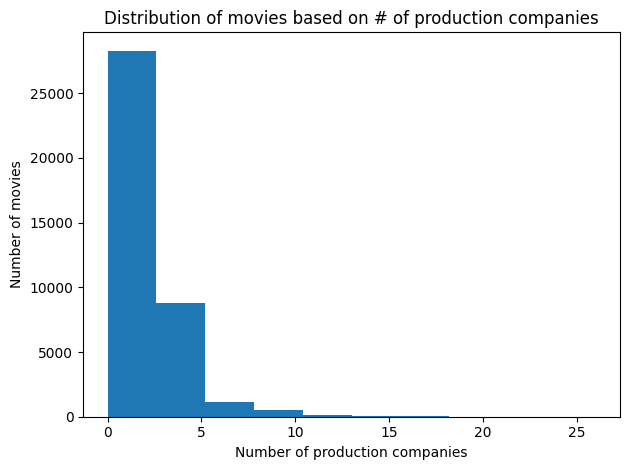

In [27]:
fig, axs = plt.subplots(1,1, tight_layout = True)
axs.hist(num_prod, bins = 10)
plt.title("Distribution of movies based on # of production companies")
plt.xlabel("Number of production companies")
plt.ylabel("Number of movies")
plt.show()

In [28]:
data = data[data['production_companies'].notna()]
len(data)

39030

### Notes
* There are no null values in the production companies column

In [29]:
all_prod = []
for i, row in data.iterrows():
    p0 = ast.literal_eval(row['production_companies'])
    prod_ = [x['name'] for x in p0]
    all_prod.append(prod_)
all_prod

[['Pixar'],
 ['TriStar Pictures', 'Teitler Film', 'Interscope Communications'],
 ['Warner Bros. Pictures', 'Lancaster Gate'],
 ['20th Century Fox'],
 ['Sandollar Productions', 'Touchstone Pictures'],
 ['Warner Bros. Pictures',
  'New Regency Productions',
  'Regency Enterprises',
  'Forward Pass',
  'Monarchy Enterprises B.V.',
  'The Linson Company'],
 ['Paramount',
  'Scott Rudin Productions',
  'Mirage Enterprises',
  'Sandollar Productions',
  'Constellation Entertainment',
  'Worldwide',
  'Mont Blanc Entertainment GmbH'],
 ['Walt Disney Pictures', 'Painted Fence Productions'],
 ['Universal Pictures',
  'Imperial Entertainment',
  'Signature Entertainment',
  'SHATTERED PRODUCTIONS'],
 ['United Artists', 'Eon Productions'],
 ['Castle Rock Entertainment', 'Wildwood Enterprises'],
 ['Castle Rock Entertainment', 'Enigma Pictures'],
 ['Universal Pictures', 'Amblin Entertainment', 'Amblimation'],
 ['Hollywood Pictures', 'Cinergi Pictures Entertainment'],
 ['Metro-Goldwyn-Mayer',
  'Le 

In [30]:
len(all_prod), len(data)

(39030, 39030)

In [31]:
unq_prod = set([item for sublist in all_prod for item in sublist])
print(len(unq_prod))
unq_prod

24299


{'New Crime Productions',
 'Pocketbook Productions',
 'Gun for Hire Films',
 'Magnus Films',
 'Filmco Limited',
 'Syndicate Films International',
 'OOO-Films',
 'Marko Röhr Productions',
 'Cimarron Productions',
 'Ay Yapım',
 '72 Productions',
 'Cocinor',
 'Distant Thunder Films',
 'Emergent Films Ltd.',
 'Alpha France',
 'Talisman Productions',
 'Kiddinx Filmproduktion',
 'Cofinova 5',
 'Periclean Productions',
 'Abramorama',
 'South Australian Feature Film Company',
 'Silverstar Limited',
 'Mar Vista Productions',
 'Monipoly Productions',
 'Magic Stone Productions',
 'Wonderview Productions',
 'Screenland Movieworld',
 'Luiz Augusto Mendes Produções Cinematográficas',
 'Trailing Johnson Productions',
 'Films 7',
 'Lita Stantic Producciones',
 'Laetitia Film',
 'Savage Cinema',
 'Bryan Foy Productions',
 'Ocean Pictures',
 'Runaway Features',
 'Aitysh Film',
 'Impact Pictures',
 'Roadshow Attractions',
 'Longview Entertainment',
 'Record Farm Industries',
 'Chadwick Pictures Corporati

### Notes
* There are 24,299 unique production companies
* If we were to only consider the first production company, there are 9,724 unique production companies 

### New Approach - Frequency Method
I am creating a new list of the production houses based on if they occur at least 3 times.

In [35]:
from collections import Counter

In [36]:
prods = [item for sublist in all_prod for item in sublist]
prod_counts = Counter(prods)
print("Uniques:", len(prod_counts))
print(prod_counts)

Uniques: 24299
Counter({'Warner Bros. Pictures': 1238, 'Metro-Goldwyn-Mayer': 1032, 'Paramount': 968, 'Universal Pictures': 917, '20th Century Fox': 915, 'Columbia Pictures': 869, 'Canal+': 577, 'United Artists': 442, 'New Line Cinema': 292, 'CNC': 287, 'RKO Radio Pictures': 263, 'Miramax': 251, 'Walt Disney Pictures': 247, 'Touchstone Pictures': 229, 'France 2 Cinéma': 205, 'StudioCanal': 201, 'Toho': 190, 'TriStar Pictures': 185, 'BBC': 184, 'TF1 Films Production': 167, 'ZDF': 160, 'Walt Disney Productions': 155, 'Shochiku': 155, 'Lionsgate': 152, 'ARTE France Cinéma': 151, 'BBC Films': 149, 'France 3 Cinéma': 147, 'RAI': 147, 'Mosfilm': 144, 'Cannon Group': 140, 'Gaumont': 139, 'American International Pictures': 138, 'ARTE': 128, 'CJ Entertainment': 127, 'Relativity Media': 127, 'Orion Pictures': 123, 'Dimension Films': 122, 'Film i Väst': 117, 'DreamWorks Pictures': 116, 'SF Studios': 115, 'Film4 Productions': 115, 'Wild Bunch': 105, 'Regency Enterprises': 104, 'Fox Searchlight Pic

In [38]:
# filter production_companies with less than 100 prods
unq_fprods = {k for k, v in prod_counts.items() if v>100}
len(unq_fprods)

48

In [39]:
prod_dict = {}
uid = len(unq_fprods)
for idx, val in enumerate(sorted(unq_fprods)):
    prod_dict[val] = idx
prod_dict['Other'] = uid
prod_dict  

{'20th Century Fox': 0,
 'ARTE': 1,
 'ARTE France Cinéma': 2,
 'American International Pictures': 3,
 'BBC': 4,
 'BBC Films': 5,
 'CJ Entertainment': 6,
 'CNC': 7,
 'Canal+': 8,
 'Cannon Group': 9,
 'Channel Four Films': 10,
 'Columbia Pictures': 11,
 'Dimension Films': 12,
 'DreamWorks Pictures': 13,
 'Film i Väst': 14,
 'Film4 Productions': 15,
 'Fox Searchlight Pictures': 16,
 'France 2 Cinéma': 17,
 'France 3 Cinéma': 18,
 'Gaumont': 19,
 'HBO': 20,
 'Lionsgate': 21,
 'Metro-Goldwyn-Mayer': 22,
 'Miramax': 23,
 'Mosfilm': 24,
 'New Line Cinema': 25,
 'Orion Pictures': 26,
 'Paramount': 27,
 'RAI': 28,
 'RKO Radio Pictures': 29,
 'Regency Enterprises': 30,
 'Relativity Media': 31,
 'SF Studios': 32,
 'SVT': 33,
 'Shochiku': 34,
 'StudioCanal': 35,
 'TF1 Films Production': 36,
 'Toho': 37,
 'Touchstone Pictures': 38,
 'TriStar Pictures': 39,
 'United Artists': 40,
 'Universal Pictures': 41,
 'Village Roadshow Pictures': 42,
 'Walt Disney Pictures': 43,
 'Walt Disney Productions': 44,

In [53]:
# save production_companies dict
prod_companies_dict = "prod_companies_dict.json"
with open(prod_companies_dict, 'w') as outfile:
    json.dump(prod_dict, outfile)

### For Top Production Company 

In [50]:
top_idx = []
for i, row in data.iterrows():
    t1 = ast.literal_eval(row['production_companies'])[:1]
    t_ = [prod_dict[x['name']] if x['name'] in unq_fprods else prod_dict['Other'] for x in t1]
#     print(t_)
    top_idx.append(t_)
# #top_idx = [x for x in top_idx if len(x) != 0]
top_idx
# len(top_idx)

[[48],
 [39],
 [45],
 [0],
 [48],
 [45],
 [27],
 [43],
 [41],
 [40],
 [48],
 [48],
 [41],
 [48],
 [22],
 [41],
 [11],
 [23],
 [45],
 [11],
 [22],
 [30],
 [8],
 [48],
 [40],
 [48],
 [25],
 [5],
 [8],
 [48],
 [48],
 [41],
 [48],
 [41],
 [35],
 [48],
 [48],
 [45],
 [27],
 [23],
 [40],
 [48],
 [23],
 [25],
 [11],
 [41],
 [25],
 [43],
 [48],
 [48],
 [48],
 [23],
 [8],
 [43],
 [23],
 [48],
 [27],
 [48],
 [10],
 [27],
 [27],
 [48],
 [23],
 [45],
 [22],
 [25],
 [23],
 [48],
 [25],
 [23],
 [45],
 [48],
 [8],
 [25],
 [45],
 [48],
 [47],
 [23],
 [11],
 [48],
 [23],
 [48],
 [48],
 [48],
 [48],
 [48],
 [0],
 [27],
 [27],
 [23],
 [39],
 [27],
 [23],
 [0],
 [48],
 [8],
 [10],
 [48],
 [48],
 [11],
 [38],
 [22],
 [41],
 [48],
 [47],
 [43],
 [],
 [],
 [48],
 [11],
 [48],
 [48],
 [48],
 [17],
 [],
 [48],
 [39],
 [48],
 [39],
 [48],
 [27],
 [48],
 [48],
 [23],
 [23],
 [48],
 [],
 [48],
 [48],
 [48],
 [27],
 [48],
 [],
 [0],
 [48],
 [],
 [10],
 [],
 [48],
 [40],
 [48],
 [48],
 [16],
 [11],
 [45],
 [25],
 [

In [51]:
Counter([x for row in top_idx for x in row])

Counter({48: 23462,
         39: 130,
         45: 1019,
         0: 893,
         27: 964,
         43: 246,
         41: 826,
         40: 416,
         22: 1001,
         11: 864,
         23: 241,
         30: 22,
         8: 375,
         25: 277,
         5: 111,
         35: 53,
         10: 80,
         47: 52,
         38: 83,
         17: 184,
         16: 96,
         19: 136,
         20: 64,
         26: 120,
         42: 82,
         4: 129,
         44: 128,
         36: 60,
         34: 154,
         29: 263,
         12: 40,
         28: 90,
         37: 160,
         24: 134,
         32: 58,
         7: 64,
         3: 75,
         13: 96,
         18: 42,
         9: 115,
         1: 56,
         2: 135,
         21: 90,
         15: 18,
         33: 24,
         6: 64,
         46: 31,
         14: 27,
         31: 12})

In [58]:
data["top_prod_company"] = top_idx

## For all production companies

In [56]:
def getProdCompanyIds(val):
    val = ast.literal_eval(val)
    val = [x['name'] for x in val]
    val = [prod_dict[x] if x in unq_fprods else prod_dict["Other"] for x in val]
    return val

In [57]:
prod_companies_col = data.production_companies.map(getProdCompanyIds)
prod_companies_col

0                [48]
1        [39, 48, 48]
2            [45, 48]
3                 [0]
4            [48, 38]
             ...     
39615            [48]
39616            [48]
39617            [48]
39618            [48]
39619            [48]
Name: production_companies, Length: 39030, dtype: object

In [62]:
data["all_prod_companies"] = prod_companies_col

## Keywords

### Dictionary Building

View sample keywords:

In [64]:
sample_keywords = data.keywords[:2].map(lambda x: ast.literal_eval(x))
print(sample_keywords[0], sample_keywords[1], sep='\n')

{'keywords': [{'id': 779, 'name': 'martial arts'}, {'id': 931, 'name': 'jealousy'}, {'id': 6054, 'name': 'friendship'}, {'id': 6733, 'name': 'bullying'}, {'id': 8102, 'name': 'elementary school'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 10084, 'name': 'rescue'}, {'id': 10364, 'name': 'mission'}, {'id': 15214, 'name': 'buddy'}, {'id': 33553, 'name': 'walkie talkie'}, {'id': 158141, 'name': 'toy car'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 180523, 'name': 'neighborhood'}, {'id': 187065, 'name': 'toy comes to life'}, {'id': 242792, 'name': 'resourcefulness'}]}
{'keywords': [{'id': 7035, 'name': 'giant insect'}, {'id': 10090, 'name': 'board game'}, {'id': 10787, 'name': 'jungle'}, {'id': 10941, 'name': 'disappearance'}, {'id': 158086, 'name': 'recluse'}, {'id': 221178, 'name': 'stampede'}, {'id': 246466, 'name': 'based on young adult novel'}]}


/var/folders/wl/614qr9zs0297plmh5fqppf4m0000gn/T/ipykernel_29885/986383425.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sample_keywords = data.keywords[:2].map(lambda x: ast.literal_eval(x))


In [66]:
all_keywords = data.keywords.map(lambda x: [y['name'] for y in ast.literal_eval(x)['keywords']])
unique_keywords = Counter([x for row in all_keywords for x in row])
unique_keywords

Counter({'martial arts': 486,
         'jealousy': 228,
         'friendship': 483,
         'bullying': 78,
         'elementary school': 16,
         'friends': 196,
         'rivalry': 113,
         'rescue': 140,
         'mission': 52,
         'buddy': 47,
         'walkie talkie': 10,
         'toy car': 3,
         'boy next door': 2,
         'new toy': 3,
         'neighborhood': 17,
         'toy comes to life': 16,
         'resourcefulness': 1,
         'giant insect': 23,
         'board game': 9,
         'jungle': 111,
         'disappearance': 76,
         'recluse': 13,
         'stampede': 5,
         'based on young adult novel': 106,
         'fishing': 27,
         'halloween': 84,
         'sequel': 505,
         'old man': 23,
         'best friend': 157,
         'wedding': 250,
         'italian restaurant': 3,
         'old friends': 9,
         'duringcreditsstinger': 431,
         'pranks': 1,
         'based on novel or book': 1838,
         'interracial r

In [67]:
len(unique_keywords)

20105

### Frequency based filtering

In [74]:
threshold = 300
keywords_set = {k for k, v in unique_keywords.items() if v >= threshold}
len(keywords_set)

44

In [77]:
keyword_dict = {}
uid = len(keywords_set)
for idx, val in enumerate(sorted(keywords_set)):
    keyword_dict[val] = idx
keyword_dict['Other'] = uid
keyword_dict

{'19th century': 0,
 'based on novel or book': 1,
 'based on play or musical': 2,
 'based on true story': 3,
 'biography': 4,
 'black and white': 5,
 'christmas': 6,
 'cult film': 7,
 'drugs': 8,
 'duringcreditsstinger': 9,
 'family': 10,
 'film noir': 11,
 'friendship': 12,
 'gangster': 13,
 'high school': 14,
 'husband wife relationship': 15,
 'kidnapping': 16,
 'lgbt': 17,
 'london, england': 18,
 'los angeles, california': 19,
 'loss of loved one': 20,
 'love': 21,
 'martial arts': 22,
 'murder': 23,
 'musical': 24,
 'new york city': 25,
 'parent child relationship': 26,
 'paris, france': 27,
 'police': 28,
 'pre-code': 29,
 'prison': 30,
 'rape': 31,
 'remake': 32,
 'revenge': 33,
 'sequel': 34,
 'serial killer': 35,
 'short film': 36,
 'sibling relationship': 37,
 'silent film': 38,
 'small town': 39,
 'sports': 40,
 'suicide': 41,
 'woman director': 42,
 'world war ii': 43,
 'Other': 44}

In [79]:
# Save the dictionary
keyword_dict_file = "prod_companies_dict.json"
with open(keyword_dict_file, 'w') as outfile:
    json.dump(keyword_dict, outfile)

### Populate the DataFrame

In [80]:
def getKeywordIds(val):
    val = ast.literal_eval(val)['keywords']
    val = [x['name'] for x in val]
    val = [keyword_dict[x] if x in keyword_dict else keyword_dict["Other"] for x in val]
    return val

In [81]:
keywords_col = data.keywords.map(getKeywordIds)
keywords_col

0        [22, 44, 12, 44, 44, 44, 44, 44, 44, 44, 44, 4...
1                             [44, 44, 44, 44, 44, 44, 44]
2                  [44, 44, 34, 44, 44, 44, 44, 44, 9, 44]
3                                          [1, 44, 44, 44]
4         [26, 44, 44, 44, 44, 44, 44, 34, 32, 19, 44, 44]
                               ...                        
39615                                         [44, 44, 44]
39616                                     [44, 44, 44, 44]
39617                                                   []
39618                                         [44, 22, 44]
39619     [15, 44, 44, 16, 44, 44, 44, 44, 44, 44, 44, 44]
Name: keywords, Length: 39030, dtype: object

In [82]:
data["all_keywords"] = keywords_col

## Final Sanity Checks

In [83]:
data.dtypes

Title                    object
imdbId                    int64
adult                   float64
budget                  float64
genres                   object
original_language       float64
original_title           object
popularity              float64
production_companies     object
release_date             object
revenue                 float64
runtime                 float64
tagline                  object
vote_average            float64
vote_count              float64
casts                    object
keywords                 object
num_releases            float64
num_translations        float64
Actors                   object
Top Genre Index          object
Top Genre Indices        object
top_prod_company         object
all_prod_companies       object
all_keywords             object
dtype: object

In [84]:
data.head()

,Title,imdbId,adult,budget,genres,original_language,original_title,popularity,production_companies,release_date,...,casts,keywords,num_releases,num_translations,Actors,Top Genre Index,Top Genre Indices,top_prod_company,all_prod_companies,all_keywords
0,Toy Story (1995),114709,0.0,1.344100,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",0.0,Toy Story,13.233161,"[{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...",1995-10-30,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 779, 'name': 'martial art...",2.198140,3.380860,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",[2],"[2, 1, 7, 3]",[48],[48],"[22, 44, 12, 44, 44, 44, 44, 44, 44, 44, 44, 4..."
1,Jumanji (1995),113497,0.0,3.233367,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",0.0,Jumanji,0.497344,"[{'id': 559, 'logo_path': '/jqWioYeGSyTLuHth01...",1995-12-15,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 7035, 'name': 'giant inse...",3.041993,2.978730,"['Robin Williams', 'Kirsten Dunst', 'Bradley P...",[1],"[1, 8, 7]",[39],"[39, 48, 48]","[44, 44, 44, 44, 44, 44, 44]"
2,Grumpier Old Men (1995),113228,0.0,1.074205,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0.0,Grumpier Old Men,0.061151,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...",1995-12-22,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 1495, 'name': 'fishing'},...",0.148783,1.370211,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret']",[13],"[13, 3]",[45],"[45, 48]","[44, 44, 34, 44, 44, 44, 44, 44, 9, 44]"
3,Waiting to Exhale (1995),114885,0.0,0.588393,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0.0,Waiting to Exhale,0.180840,"[{'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVR...",1995-12-22,...,"{'cast': [{'adult': False, 'gender': 1, 'id': ...","{'keywords': [{'id': 818, 'name': 'based on no...",0.148783,0.465419,"['Whitney Houston', 'Angela Bassett', 'Loretta...",[3],"[3, 6, 13]",[0],[0],"[1, 44, 44, 44]"
4,Father of the Bride Part II (1995),113041,0.0,-0.275271,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",0.0,Father of the Bride Part II,0.311671,"[{'id': 5842, 'logo_path': None, 'name': 'Sand...",1995-12-08,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 970, 'name': 'parent chil...",0.510435,1.671808,"['Steve Martin', 'Diane Keaton', 'Martin Short']",[3],"[3, 7]",[48],"[48, 38]","[26, 44, 44, 44, 44, 44, 44, 34, 32, 19, 44, 44]"


**Why is original_language float?**

In [89]:
# reset index to get serial numbers
data.reset_index(inplace=True)
data.drop("index", axis=1, inplace=True)
data.head()

,Title,imdbId,adult,budget,genres,original_language,original_title,popularity,production_companies,release_date,...,casts,keywords,num_releases,num_translations,Actors,Top Genre Index,Top Genre Indices,top_prod_company,all_prod_companies,all_keywords
0,Toy Story (1995),114709,0.0,1.344100,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",0.0,Toy Story,13.233161,"[{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...",1995-10-30,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 779, 'name': 'martial art...",2.198140,3.380860,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",[2],"[2, 1, 7, 3]",[48],[48],"[22, 44, 12, 44, 44, 44, 44, 44, 44, 44, 44, 4..."
1,Jumanji (1995),113497,0.0,3.233367,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",0.0,Jumanji,0.497344,"[{'id': 559, 'logo_path': '/jqWioYeGSyTLuHth01...",1995-12-15,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 7035, 'name': 'giant inse...",3.041993,2.978730,"['Robin Williams', 'Kirsten Dunst', 'Bradley P...",[1],"[1, 8, 7]",[39],"[39, 48, 48]","[44, 44, 44, 44, 44, 44, 44]"
2,Grumpier Old Men (1995),113228,0.0,1.074205,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0.0,Grumpier Old Men,0.061151,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...",1995-12-22,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 1495, 'name': 'fishing'},...",0.148783,1.370211,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret']",[13],"[13, 3]",[45],"[45, 48]","[44, 44, 34, 44, 44, 44, 44, 44, 9, 44]"
3,Waiting to Exhale (1995),114885,0.0,0.588393,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0.0,Waiting to Exhale,0.180840,"[{'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVR...",1995-12-22,...,"{'cast': [{'adult': False, 'gender': 1, 'id': ...","{'keywords': [{'id': 818, 'name': 'based on no...",0.148783,0.465419,"['Whitney Houston', 'Angela Bassett', 'Loretta...",[3],"[3, 6, 13]",[0],[0],"[1, 44, 44, 44]"
4,Father of the Bride Part II (1995),113041,0.0,-0.275271,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",0.0,Father of the Bride Part II,0.311671,"[{'id': 5842, 'logo_path': None, 'name': 'Sand...",1995-12-08,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 970, 'name': 'parent chil...",0.510435,1.671808,"['Steve Martin', 'Diane Keaton', 'Martin Short']",[3],"[3, 7]",[48],"[48, 38]","[26, 44, 44, 44, 44, 44, 44, 34, 32, 19, 44, 44]"


In [90]:
data.to_csv("preprocessing_data_manasa.csv")

### END